# Importing libraries

In [96]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing dataset

In [97]:
dataset = pd.read_csv('bbc_news_text_complexity_summarization.csv')

In [98]:
dataset.head()

,text,labels,no_sentences,Flesch Reading Ease Score,Dale-Chall Readability Score,text_rank_summary,lsa_summary
0,Ad sales boost Time Warner profit\n\nQuarterly...,business,26,62.17,9.72,It hopes to increase subscribers by offering t...,Its profits were buoyed by one-off gains which...
1,Dollar gains on Greenspan speech\n\nThe dollar...,business,17,65.56,9.09,The dollar has hit its highest level against t...,"""I think the chairman's taking a much more san..."
2,Yukos unit buyer faces loan claim\n\nThe owner...,business,14,69.21,9.66,The owners of embattled Russian oil giant Yuko...,Yukos' owner Menatep Group says it will ask Ro...
3,High fuel prices hit BA's profits\n\nBritish A...,business,24,62.98,9.86,Looking ahead to its full year results to Marc...,"Rod Eddington, BA's chief executive, said the ..."
4,Pernod takeover talk lifts Domecq\n\nShares in...,business,17,70.63,10.23,Reports in the Wall Street Journal and the Fin...,Shares in UK drinks and food firm Allied Domec...


# Cleaning dataset

In [99]:
# pip install nltk

In [100]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rajatthakur/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [101]:
# Handling null values
dataset = dataset.dropna(subset=['text'])

#remove duplicate rows
dataset.drop_duplicates(inplace=True)

corpus = []
stop_words = set(stopwords.words('english')) # Load stopwords once
ps= PorterStemmer() # Create stemmer 
for i in range(len(dataset)):
    try:
        review = re.sub('[^a-zA-Z]', ' ', dataset['text'][i]).lower() # Remove non-alphabetic characters and convert to lowercase
        
        # Tokenize and remove stopwords
        review = review.split()
        review = [ps.stem(word) for word in review if word not in stop_words]
        
        review = ' '.join(review) # Rejoin the words and add to the corpus
        if review.strip(): # Avoid adding empty strings
            corpus.append(review)
    except Exception as e:
        print(f" Error Processing row {i}: {e}")
    

In [102]:
corpus

['ad sale boost time warner profit quarterli profit us media giant timewarn jump bn three month decemb year earlier firm one biggest investor googl benefit sale high speed internet connect higher advert sale timewarn said fourth quarter sale rose bn bn profit buoy one gain offset profit dip warner bro less user aol time warner said friday own search engin googl internet busi aol mix fortun lost subscrib fourth quarter profit lower preced three quarter howev compani said aol underli profit except item rose back stronger internet advertis revenu hope increas subscrib offer onlin servic free timewarn internet custom tri sign aol exist custom high speed broadband timewarn also restat result follow probe us secur exchang commiss sec close conclud time warner fourth quarter profit slightli better analyst expect film divis saw profit slump help box offic flop alexand catwoman sharp contrast year earlier third final film lord ring trilog boost result full year timewarn post profit bn perform r

# EDA

In [103]:
# Types of labels
print(dataset['labels'].unique())

['business' 'entertainment' 'politics' 'sport' 'tech']


In [104]:

avgOutput = dataset.groupby('labels').agg({
    'no_sentences': 'mean',
    'Flesch Reading Ease Score': 'mean',
    'Dale-Chall Readability Score': 'mean'
})
avgOutput = avgOutput.rename(columns={
    'no_sentences': 'Average Number of sentences',
    'Flesch Reading Ease Score': 'Average Readability Score',
    'Dale-Chall Readability Score': 'Average Difficult Word Readability Score'
})

display(avgOutput)

,Average Number of sentences,Average Readability Score,Average Difficult Word Readability Score
labels,,,
business,17.707753,61.271412,9.578748
entertainment,16.577236,65.132981,9.421653
politics,19.965261,60.368660,8.957568
sport,17.116832,69.841109,8.790000
tech,24.873199,60.294409,8.959942


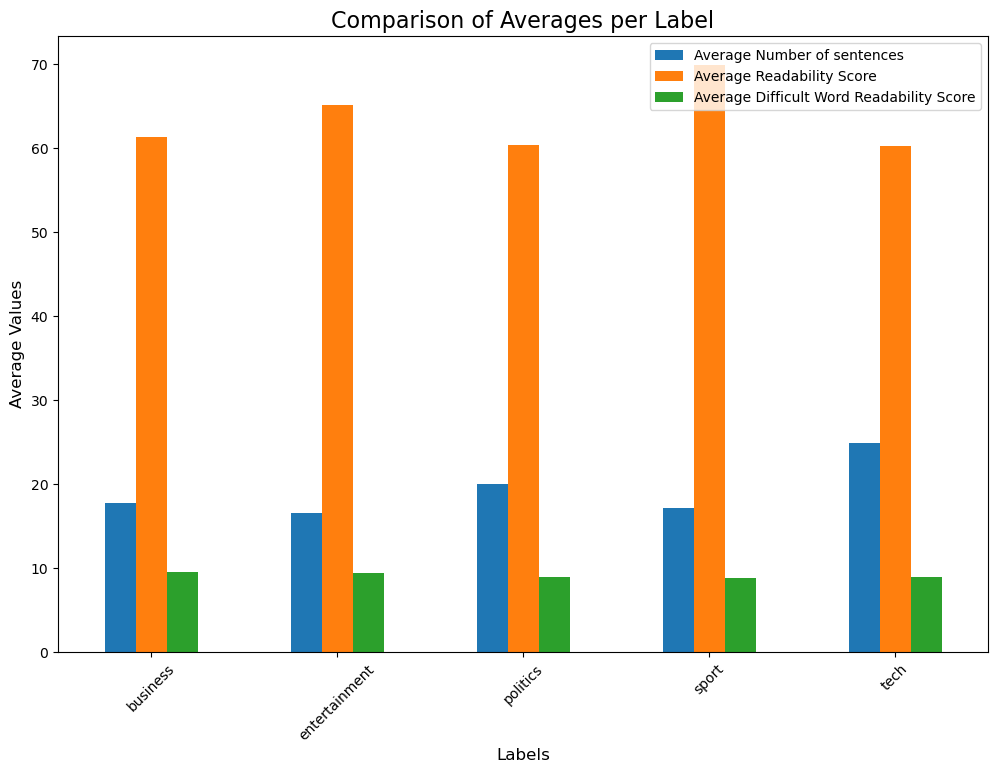

In [105]:
avgOutput.plot(kind='bar', figsize=(12, 8))
plt.title('Comparison of Averages per Label', fontsize=16)
plt.ylabel('Average Values', fontsize=12)
plt.xlabel('Labels', fontsize=12)
plt.xticks(rotation=45)
plt.legend(loc='upper right', fontsize=10)
plt.show()


/var/folders/7h/099t5t950s10yv3y5sz80ls00000gn/T/ipykernel_12032/405150253.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='labels', y='Flesch Reading Ease Score', data=dataset, palette='coolwarm')


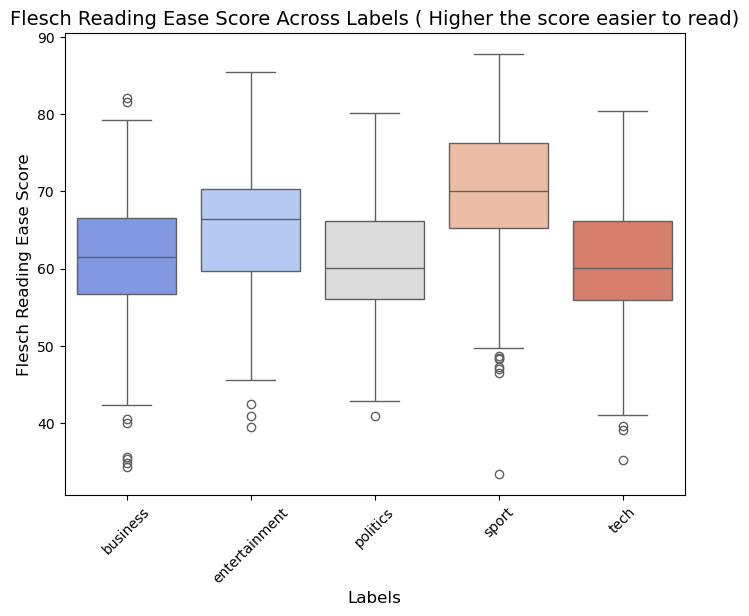

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a boxplot for readability scores across labels
plt.figure(figsize=(8, 6))
sns.boxplot(x='labels', y='Flesch Reading Ease Score', data=dataset, palette='coolwarm')

plt.title('Flesch Reading Ease Score Across Labels ( Higher the score easier to read)', fontsize=14)
plt.xlabel('Labels', fontsize=12)
plt.ylabel('Flesch Reading Ease Score', fontsize=12)

plt.xticks(rotation=45)
plt.show()


label counts labels
sport            505
business         503
politics         403
entertainment    369
tech             347
Name: count, dtype: int64


/var/folders/7h/099t5t950s10yv3y5sz80ls00000gn/T/ipykernel_12032/60683996.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')


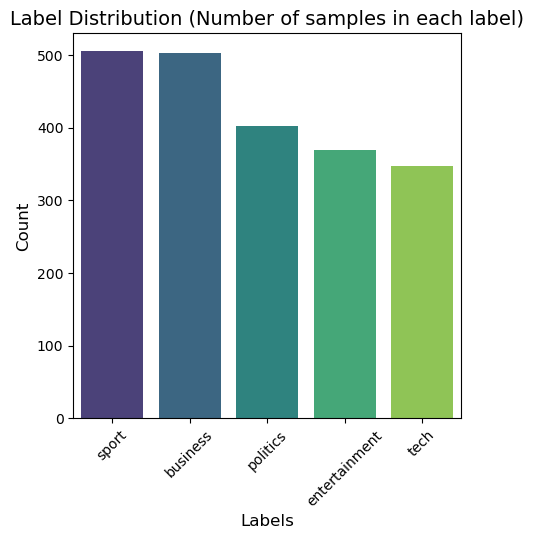

In [107]:
# Count the number of samples in each label
label_counts = dataset['labels'].value_counts()
print('label counts',label_counts)

plt.figure(figsize=(5, 5))
sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')
plt.title('Label Distribution (Number of samples in each label)', fontsize=14)
plt.xlabel('Labels', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()


In [108]:
#pip install wordcloud

Most Common Words


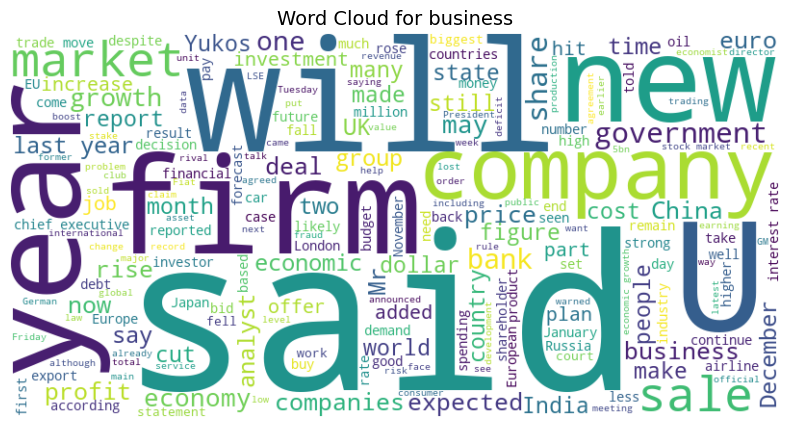

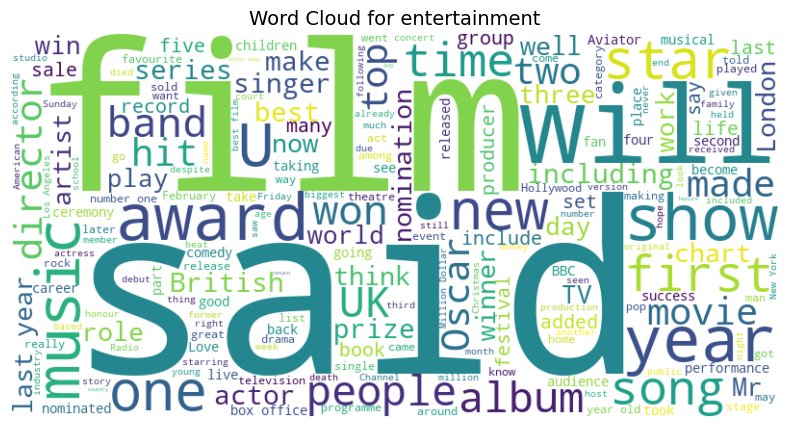

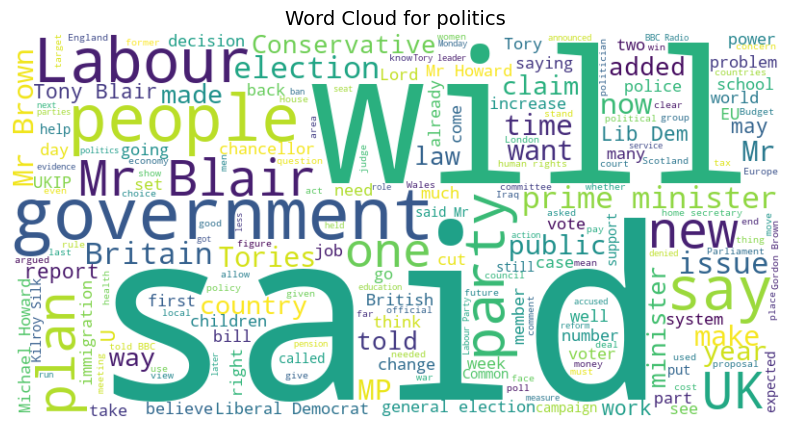

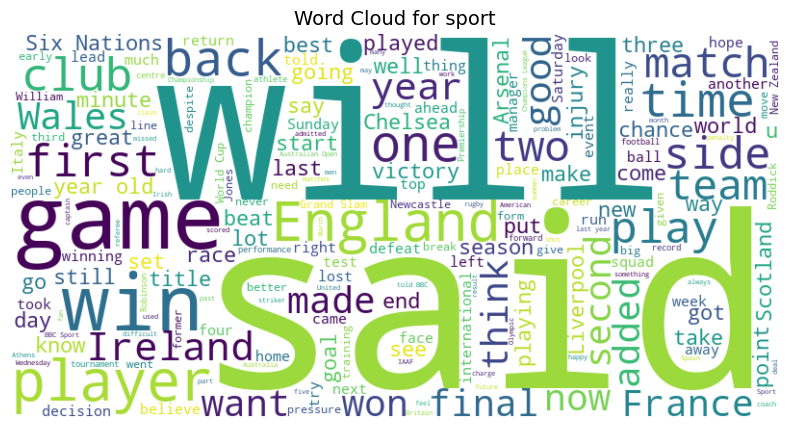

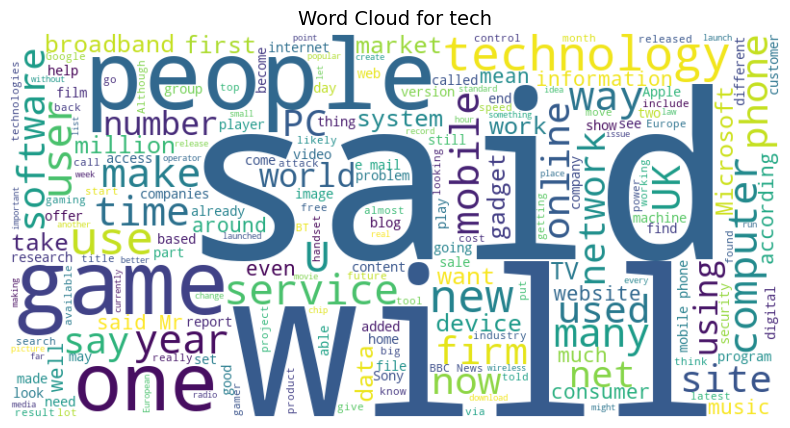

In [109]:
from collections import Counter
from wordcloud import WordCloud

print('Most Common Words')
# Generate a word cloud for each label
for label in dataset['labels'].unique():
    text = ' '.join(dataset[dataset['labels'] == label]['text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {label}', fontsize=14)
    plt.axis('off')
    plt.show()


Most common words: [('said', 6930), ('year', 3194), ('mr', 2900), ('would', 2472), ('also', 2037), ('peopl', 1896), ('us', 1885), ('new', 1877), ('one', 1851), ('game', 1620)]


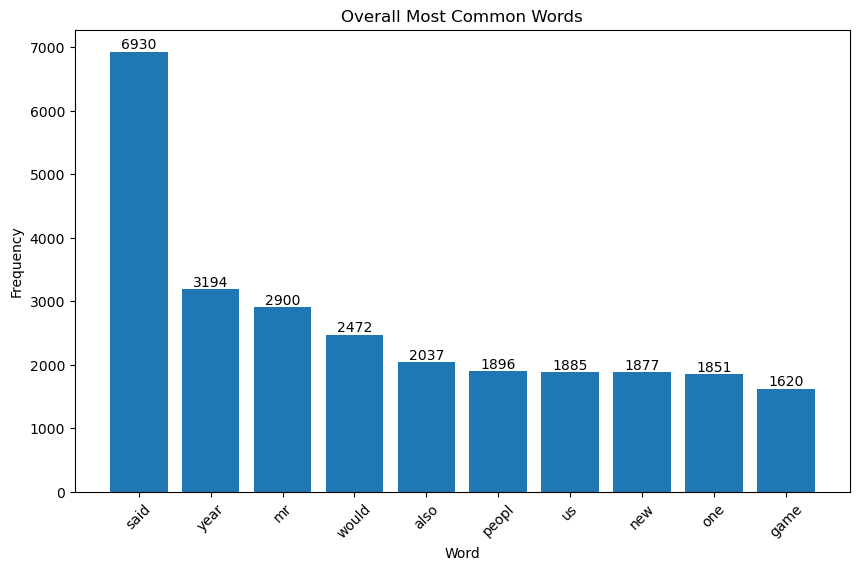

In [110]:

# Most Common Words
all_words = ' '.join(corpus).split()
common_words = Counter(all_words).most_common(10)
print(f"Most common words: {common_words}")# Most Common Words

words, frequencies = zip(*common_words)

# Create a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(words, frequencies)

# Add text labels to the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height,
             str(height), ha='center', va='bottom')

plt.xlabel('Word')

plt.ylabel('Frequency')
plt.title('Overall Most Common Words')
plt.xticks(rotation=45)
plt.show()

# Feature Engineering & Model Selection

In [112]:
dataset.head()

,text,labels,no_sentences,Flesch Reading Ease Score,Dale-Chall Readability Score,text_rank_summary,lsa_summary
0,Ad sales boost Time Warner profit\n\nQuarterly...,business,26,62.17,9.72,It hopes to increase subscribers by offering t...,Its profits were buoyed by one-off gains which...
1,Dollar gains on Greenspan speech\n\nThe dollar...,business,17,65.56,9.09,The dollar has hit its highest level against t...,"""I think the chairman's taking a much more san..."
2,Yukos unit buyer faces loan claim\n\nThe owner...,business,14,69.21,9.66,The owners of embattled Russian oil giant Yuko...,Yukos' owner Menatep Group says it will ask Ro...
3,High fuel prices hit BA's profits\n\nBritish A...,business,24,62.98,9.86,Looking ahead to its full year results to Marc...,"Rod Eddington, BA's chief executive, said the ..."
4,Pernod takeover talk lifts Domecq\n\nShares in...,business,17,70.63,10.23,Reports in the Wall Street Journal and the Fin...,Shares in UK drinks and food firm Allied Domec...


In [113]:
dataset['labels'].unique()

array(['business', 'entertainment', 'politics', 'sport', 'tech'],
      dtype=object)

In [114]:
# can't work with one hot encoding bec it creates a DF, and below we are using NB model and that accepts 1D array of labels
#labels_dummies = pd.get_dummies(dataset['labels'], drop_first= True, dtype=int)

In [115]:
#labels_dummies

In [116]:
#datasetNew = pd.concat([labels_dummies, dataset], axis=1)

In [117]:
datasetNew.head()

,entertainment,politics,sport,tech,text,labels,no_sentences,Flesch Reading Ease Score,Dale-Chall Readability Score,text_rank_summary,lsa_summary,cleaned_text
0,0,0,0,0,Ad sales boost Time Warner profit\n\nQuarterly...,business,26,62.17,9.72,It hopes to increase subscribers by offering t...,Its profits were buoyed by one-off gains which...,ad sale boost time warner profit quarterli pro...
1,0,0,0,0,Dollar gains on Greenspan speech\n\nThe dollar...,business,17,65.56,9.09,The dollar has hit its highest level against t...,"""I think the chairman's taking a much more san...",dollar gain greenspan speech dollar hit highes...
2,0,0,0,0,Yukos unit buyer faces loan claim\n\nThe owner...,business,14,69.21,9.66,The owners of embattled Russian oil giant Yuko...,Yukos' owner Menatep Group says it will ask Ro...,yuko unit buyer face loan claim owner embattl ...
3,0,0,0,0,High fuel prices hit BA's profits\n\nBritish A...,business,24,62.98,9.86,Looking ahead to its full year results to Marc...,"Rod Eddington, BA's chief executive, said the ...",high fuel price hit ba profit british airway b...
4,0,0,0,0,Pernod takeover talk lifts Domecq\n\nShares in...,business,17,70.63,10.23,Reports in the Wall Street Journal and the Fin...,Shares in UK drinks and food firm Allied Domec...,pernod takeov talk lift domecq share uk drink ...


In [125]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(dataset['labels']);

In [128]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(dataset['text']).toarray()


In [ ]:
# Train Test Split

In [129]:
from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test, train_idx, test_idx = train_test_split( X, y, dataset.index, test_size=0.2, random_state=42)


In [ ]:
#Model Selection

In [130]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_labels = label_encoder.inverse_transform(y_pred)

In [131]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [132]:
print("Accuracy Score ", accuracy_score(y_test,y_pred))

Accuracy Score  0.9553990610328639


In [133]:
print("Confusion Metrics", confusion_matrix(y_test, y_pred))

Confusion Metrics [[100   0   2   0   2]
 [  2  67   6   2   1]
 [  0   0  72   1   0]
 [  0   0   0  98   0]
 [  2   1   0   0  70]]


In [134]:
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


               precision    recall  f1-score   support

     business       0.96      0.96      0.96       104
entertainment       0.99      0.86      0.92        78
     politics       0.90      0.99      0.94        73
        sport       0.97      1.00      0.98        98
         tech       0.96      0.96      0.96        73

     accuracy                           0.96       426
    macro avg       0.96      0.95      0.95       426
 weighted avg       0.96      0.96      0.95       426



In [145]:
y_test_labels = label_encoder.inverse_transform(y_test)

results_df=pd.DataFrame({
    'Text': dataset.loc[test_idx, 'text'].values, 
    'Actual Label': y_test_labels,
    'Predicted Labels': y_pred_labels
})

display(results_df.head())


,Text,Actual Label,Predicted Labels
0,EU 'too slow' on economic reforms\n\nMost EU c...,business,business
1,BBC web search aids odd queries\n\nThe BBC's o...,tech,tech
2,Serena becomes world number two\n\nSerena Will...,sport,sport
3,Boothroyd calls for Lords speaker\n\nBetty Boo...,politics,politics
4,Fast lifts rise into record books\n\nTwo high-...,tech,business


In [141]:
# Function to predict the label of a given text
def predict_label(text):
    processed_text = re.sub('[^a-zA-Z]', ' ', text).lower()
    processed_text = ' '.join([word for word in processed_text.split() if word not in stop_words])
    
    # Transforming the text into TF-IDF features
    text_tfidf = tfidf.transform([processed_text]).toarray()
    
    # Predicting the label
    predicted_label_encoded = model.predict(text_tfidf)
    predicted_label = label_encoder.inverse_transform(predicted_label_encoded)
    
    return predicted_label[0]  


custom_text = "The upcoming football season promises intense rivalries, record-breaking performances, and unexpected twists, captivating fans worldwide."
predicted_label = predict_label(custom_text)

print(f"Text: {custom_text}")
print(f"Predicted Label: {predicted_label}")


Text: The upcoming football season promises intense rivalries, record-breaking performances, and unexpected twists, captivating fans worldwide.
Predicted Label: sport
